# 1. Import packages


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# 2. Read dataset

In [60]:
df = pd.read_csv('London_transport_network.csv').dropna()
df.head()

,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.23,2.50,2.50
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.88,2.00,2.00
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.50,1.50,1.50
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.92,2.06,2.06
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.23,3.13,3.13


In [61]:
df1 = pd.read_csv('London stations.csv').dropna()
df1.head()

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Abbey Road,539081,183352,51.531952,0.003723,3,E15 3NB
1,Abbey Wood,547297,179002,51.490784,0.120272,4,SE2 9RH
2,Acton Central,520613,180299,51.508757,-0.263430,2,W3 6BH
3,Acton Main Line,520296,181196,51.516886,-0.267690,3,W3 9EH
4,Acton Town,519457,179639,51.503071,-0.280303,3,W3 8HN


# 2. Understanding Data

In [62]:
df_stations = pd.DataFrame(pd.concat([df['Station from (A)'], df['Station to (B)']]).unique(), columns=['Name'])
df_stations

,Name
0,HARROW & WEALDSTONE
1,KENTON
2,SOUTH KENTON
3,NORTH WEMBLEY
4,WEMBLEY CENTRAL
...,...
281,ROTHERHITHE
282,WAPPING
283,SHADWELL
284,SHOREDITCH


In [63]:
df_stations_1 = df_stations.merge(df1, left_on='Name', right_on='Station', how='left')
df_stations_1

,Name,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,HARROW & WEALDSTONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KENTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOUTH KENTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NORTH WEMBLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WEMBLEY CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
281,ROTHERHITHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,WAPPING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,SHADWELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,SHOREDITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_stations_1[df_stations_1['Station'].isnull()]

,Name,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,HARROW & WEALDSTONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KENTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOUTH KENTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NORTH WEMBLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WEMBLEY CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
281,ROTHERHITHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,WAPPING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,SHADWELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,SHOREDITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
for index, row in df_stations_1[df_stations_1['Station'].isnull()].iterrows():
    station_name = row['Name'].lower() # Case-insensitive
    # Check if there are any matching stations in df1
    matching_stations = df1[df1['Station'].str.contains(station_name, case=False, na=False)]
    # print(matching_stations)
    
    for _, row1 in matching_stations.iterrows():
        matching_station_name = row1['Station'].lower() # Case-insensitive
        if matching_station_name == station_name and len(row1['Station']) >= len(station_name):
            print(row['Name'], '-', row1['Station'])
            # break
    
    if matching_stations.empty:
        first_station_name = row['Name'].split(' ')[0].lower() # Only the first word
        matching_stations = df1[df1['Station'].str.contains(first_station_name, case=False, na=False)]
        for _, row1 in matching_stations.iterrows():
            matching_station_name = row1['Station'].split(' ')[0].lower() # Only the first word
            # matching_station_name = row1['Station'].lower()
            if matching_station_name == first_station_name and len(row1['Station']) >= len(first_station_name):
                print(row['Name'], '-', row1['Station'])
                # break
        
    
    # if not matching_stations.empty:
    #     print(row['Name'], ' - ', matching_stations.iloc[0]['Station'])

HARROW & WEALDSTONE - Harrow and Wealdstone
KENTON - Kenton
SOUTH KENTON - South Kenton
NORTH WEMBLEY - North Wembley
WEMBLEY CENTRAL - Wembley Central
STONEBRIDGE PARK - Stonebridge Park
HARLESDEN - Harlesden
WILLESDEN JUNCTION - Willesden Junction
KENSAL GREEN - Kensal Green
QUEENS PARK - Queens Park
KILBURN PARK - Kilburn Park
MAIDA VALE - Maida Vale
WARWICK AVENUE - Warwick Avenue
PADDINGTON - Paddington
MARYLEBONE - Marylebone
BAKER STREET - Baker Street
REGENTS PARK - Regents Park
OXFORD CIRCUS - Oxford Circus
PICCADILLY CIRCUS - Piccadilly Circus
CHARING CROSS - Charing Cross
EMBANKMENT - Embankment
WATERLOO - Waterloo
LAMBETH NORTH - Lambeth North
ELEPHANT & CASTLE - Elephant and Castle
WEST RUISLIP - West Ruislip
RUISLIP GARDENS - Ruislip Gardens
SOUTH RUISLIP - South Ruislip
NORTHOLT - Northolt
GREENFORD - Greenford
PERIVALE - Perivale
HANGER LANE - Hanger Lane
EALING BROADWAY - Ealing Broadway
WEST ACTON - West Acton
NORTH ACTON - North Acton
EAST ACTON - East Acton
WHITE CI

C:\Users\Danh Phan\AppData\Local\Temp\ipykernel_34532\3594875793.py:4: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



# 3. Preprocessing
This section will:
<br>
<b>Capitalize the stations name</b>
<br>
<b>Remove . </b> after St. in df1
<br>
<b>Remove ' </b> in df1 
<br>
<b>Remove (...) </b> in df
<br>
<b>Remove (...) </b> in df1 
<br>
<b>Replace "-" with " " </b> in df1 
<br>
<b>Replace "and " with & </b> in df1 
<br>
<b>Heathrow 123, Heathrow Terminal Four: </b> add the word "Terminal" and space between numbers in df <br>
<b>Walthamstow, Highbury: </b> change the name to Walthamstow Central and Highbury & Islington in df <br>

## 3.1. Capitalize stations name

In [66]:
df['Station from (A)'] = df['Station from (A)'].str.title()
df['Station to (B)'] = df['Station to (B)'].str.title()
df.head()

,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,Bakerloo,Southbound,Harrow & Wealdstone,Kenton,1.74,2.23,2.50,2.50
1,Bakerloo,Southbound,Kenton,South Kenton,1.40,1.88,2.00,2.00
2,Bakerloo,Southbound,South Kenton,North Wembley,0.90,1.50,1.50,1.50
3,Bakerloo,Southbound,North Wembley,Wembley Central,1.27,1.92,2.06,2.06
4,Bakerloo,Southbound,Wembley Central,Stonebridge Park,1.71,2.23,3.13,3.13


## 3.2. Remove "." after "St"

In [67]:
df1['Station'] = df1['Station'].str.replace('St.', 'St')
df1[df1['Station'].str.contains('St.')]

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
23,Baker Street,527965,182078,51.523129,-0.156904,1,NW1 5LA
36,Battersea Power Station,529122,177252,51.479496,-0.142001,1,SW11 8AL
63,Bond Street,528497,181053,51.513797,-0.149614,1,W1C 2HU
96,Cannon Street,532623,180888,51.511362,-0.090251,1,EC4N 6AP
127,Church Street,532041,165555,51.373706,-0.104347,"3,4,5,6",CR0 1RN
130,Clapham High Street,529824,175709,51.465469,-0.132465,2,SW4 6DQ
212,Fenchurch Street,533434,180932,51.511567,-0.078554,1,EC3M 4AJ
224,George Street,532432,165594,51.373966,-0.098718,"3,4,5,6",CRO 1LA
230,Goodge Street,529505,181837,51.520613,-0.134808,1,W1T 2HF
237,Great Portland Street,528861,182174,51.523789,-0.143961,1,W1W 5PP


## 3.3. Remove " ' "

In [68]:
df1['Station'] = df1['Station'].str.replace("'", "")
df1[df1['Station'].str.contains("King")]
df1[df1['Station'].str.contains("Jame")]

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
514,St James Street,536402,188694,51.580609,-0.032805,3,E17 7PJ
519,St Jamess Park,529629,179503,51.499610,-0.133879,1,SW1H 0BD


## 3.4. Remove (...)

In [69]:
df1['Station'] = df1['Station'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
df['Station from (A)'] = df['Station from (A)'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
df['Station to (B)'] = df['Station to (B)'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)

df1[df1['Station'].str.contains("Baker")]
df[df['Station from (A)'].str.contains("Baker")]
df[df['Station to (B)'].str.contains("Baker")]

,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
15,Bakerloo,Southbound,Marylebone,Baker Street,0.50,1.17,1.50,1.50
31,Bakerloo,Northbound,Regents Park,Baker Street,0.88,1.65,2.00,2.00
190,Jubilee,Eastbound,St Johns Wood,Baker Street,2.06,2.77,3.50,3.50
216,Jubilee,Westbound,Bond Street,Baker Street,1.66,2.28,2.50,2.50
438,Metropolitan,Westbound,Great Portland Street,Baker Street,0.92,2.23,4.08,3.82
492,Metropolitan,Eastbound,Finchley Road,Baker Street,3.38,6.13,7.11,6.40
509,H & C,Eastbound,Edgware Road,Baker Street,0.72,1.47,2.84,2.50
545,H & C,Westbound,Great Portland Street,Baker Street,0.92,1.57,2.90,2.07
580,Circle,Inner,Great Portland Street,Baker Street,0.92,1.57,2.90,2.07
582,Circle,Outer,Edgware Road,Baker Street,0.72,1.47,2.84,2.50


## 3.5. Correct some station names

In [70]:
# Replace specific substrings in 'Station from (A)' and 'Station to (B)'
df['Station from (A)'] = df['Station from (A)'].replace({
    'Harrow-On-The-Hill': 'Harrow-on-the-Hill',
    'Bromley By Bow': 'Bromley-by-Bow',
    'Heathrow 123': 'Heathrow Terminals 1 2 3',
    'Heathrow Terminal Four': 'Heathrow Terminal 4',
    'Walthamstow': 'Walthamstow Central',
    'Highbury': 'Highbury & Islington',
    'Shoreditch': 'Shoreditch High Street'
})

df['Station to (B)'] = df['Station to (B)'].replace({
    'Harrow-On-The-Hill': 'Harrow-on-the-Hill',
    'Bromley By Bow': 'Bromley-by-Bow',
    'Heathrow 123': 'Heathrow Terminals 1 2 3',
    'Heathrow Terminal Four': 'Heathrow Terminal 4',
    'Walthamstow': 'Walthamstow Central',
    'Highbury': 'Highbury & Islington',
    'Shoreditch': 'Shoreditch High Street'
})

df1['Station'] = df1['Station'].str.replace('Jamess', 'James')

df[df['Station from (A)'].str.contains('Harrow')]
df[df['Station from (A)'].str.contains('Bromley')]
df1[df1['Station'].str.contains('James')]

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
514,St James Street,536402,188694,51.580609,-0.032805,3,E17 7PJ
519,St James Park,529629,179503,51.499610,-0.133879,1,SW1H 0BD


## 3.6. Replace "and" with "&"

In [71]:
# Replace occurrences of "and" with "&" in 'Station' column
df1['Station'] = df1['Station'].str.replace(r'\band\b', '&', regex=True)
df1['Station'] = df1['Station'].str.replace(r'\band\b', '&', regex=True)

df1[df1['Station'].str.contains('&')]

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
89,Caledonian Road & Barnsbury,530800,184393,51.543284,-0.115205,2,N1 0SL
109,Chalfont & Latimer,499610,197550,51.667907,-0.561068,8,HP7 9PR
147,Crossharbour & London Arena,537896,179301,51.495840,-0.014933,2,E14 8AD
187,Elephant & Castle,531940,179144,51.495849,-0.100739,"1,2",SE1 6LW
191,Elstree & Borehamwood,519098,196299,51.652875,-0.279829,6,WD6 3LS
216,Finchley Road & Frognal,526035,185033,51.550119,-0.183651,2,NW3 5HT
264,Harrow & Wealdstone,515486,189508,51.592594,-0.334253,5,HA3 7RF
270,Hayes & Harlington,509717,179417,51.503048,-0.420642,5,UB3 4BX
282,Highbury & Islington,531562,184770,51.546495,-0.104082,2,N1 1SE
538,Sudbury & Harrow Road,516853,185300,51.554493,-0.315926,4,HA0 2HA


## 3.7. Extract stations to a new DataFrame

In [72]:
# Trim station names the last time
df['Station from (A)'] = df['Station from (A)'].str.strip()
df['Station to (B)'] = df['Station to (B)'].str.strip()
df1['Station'] = df1['Station'].str.strip()

In [73]:
df_stations = pd.DataFrame(pd.concat([df['Station from (A)'], df['Station to (B)']]).unique(), columns=['Name'])
df_stations

,Name
0,Harrow & Wealdstone
1,Kenton
2,South Kenton
3,North Wembley
4,Wembley Central
...,...
267,Surrey Quays
268,Rotherhithe
269,Wapping
270,Shadwell


Merge the location dataset with the stations dataset

In [74]:
df_stations_1 = df_stations.merge(df1, left_on='Name', right_on='Station', how='left')
df_stations_1

,Name,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Harrow & Wealdstone,Harrow & Wealdstone,515486,189508,51.592594,-0.334253,5,HA3 7RF
1,Kenton,Kenton,516833,188304,51.581496,-0.315217,4,HA3 0XS
2,South Kenton,South Kenton,517350,187153,51.571044,-0.308143,4,HA9 8QT
3,North Wembley,North Wembley,517663,186198,51.562396,-0.303948,4,HA0 3NT
4,Wembley Central,Wembley Central,518214,185039,51.551864,-0.296392,4,HA9 6AG
...,...,...,...,...,...,...,...,...
269,Surrey Quays,Surrey Quays,535641,178954,51.493267,-0.047530,2,SE16 2UE
270,Rotherhithe,Rotherhithe,535239,179870,51.501594,-0.052966,2,SE16 4LF
271,Wapping,Wapping,535030,180170,51.504340,-0.055861,2,E1W 3PA
272,Shadwell,Shadwell,534936,180942,51.511300,-0.056919,2,E1 2QE


In [75]:
df_stations_1[df_stations_1['Station'].isnull()]

,Name,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode


## 3.8. Extract lines to a new DataFrame

In [76]:
# Trim station lines the last time
df['Line'] = df['Line'].str.strip()

df_lines = pd.DataFrame(df['Line'].str.strip().unique(), columns=['Line']) # Trim whitespaces
df_lines

,Line
0,Bakerloo
1,Central
2,Victoria
3,Waterloo & City
4,Jubilee
5,Northern
6,Piccadilly
7,Metropolitan
8,H & C
9,Circle


# 4. Exploratory Analysis, Explanatory Analysis (Done)

# 5. Feature Engineering
This section will do several actions:
1. Style colors for the lines and add it to the DataFrame
2. Remove unnecessary columns

## 5.1. Style colors for the lines and add it to the DataFrame

Line colors get from https://assets.nationalrail.co.uk/e8xgegruud3g/15WiPgTRPGTuEUQC4dDJDv/367cc30c505e9c45b759c0fa57627648/London_Rail___Tube_Map_December_2023.pdf and http://www.railwaycodes.org.uk/line/track/distances/undergrounddistances.pdf

In [77]:
colors = {
    'Bakerloo': 'brown',
    'Central': 'red',
    'Victoria': '#6EACDA',
    'Waterloo & City': '#9CDBA6',
    'Jubilee': 'grey',
    'Northern': 'black',
    'Piccadilly': 'blue',
    'Metropolitan': 'purple',
    'H & C': 'pink',
    'Circle': 'yellow',
    'District': 'green',
    'East London': 'orange',
}

In [78]:
df_lines['Color'] = df_lines['Line'].map(colors)
df_lines

,Line,Color
0,Bakerloo,brown
1,Central,red
2,Victoria,#6EACDA
3,Waterloo & City,#9CDBA6
4,Jubilee,grey
5,Northern,black
6,Piccadilly,blue
7,Metropolitan,purple
8,H & C,pink
9,Circle,yellow


## 5.2. Remove unnecessary columns

In [79]:
df.drop(["Un-impeded Running Time (Mins)", "AM peak (0700-1000) Running Time (Mins)", "Inter peak (1000 - 1600) Running time (mins)", "Direction"], axis=1, inplace=True)
df

,Line,Station from (A),Station to (B),Distance (Kms)
0,Bakerloo,Harrow & Wealdstone,Kenton,1.74
1,Bakerloo,Kenton,South Kenton,1.40
2,Bakerloo,South Kenton,North Wembley,0.90
3,Bakerloo,North Wembley,Wembley Central,1.27
4,Bakerloo,Wembley Central,Stonebridge Park,1.71
...,...,...,...,...
738,East London,Wapping,Rotherhithe,0.51
739,East London,Rotherhithe,Canada Water,0.32
740,East London,Canada Water,Surrey Quays,0.55
741,East London,Surrey Quays,New Cross,2.27


In [80]:
df_stations_1.drop(['Name', 'OS X', 'OS Y', 'Zone', 'Postcode'], axis=1, inplace=True)
df_stations_1

,Station,Latitude,Longitude
0,Harrow & Wealdstone,51.592594,-0.334253
1,Kenton,51.581496,-0.315217
2,South Kenton,51.571044,-0.308143
3,North Wembley,51.562396,-0.303948
4,Wembley Central,51.551864,-0.296392
...,...,...,...
269,Surrey Quays,51.493267,-0.047530
270,Rotherhithe,51.501594,-0.052966
271,Wapping,51.504340,-0.055861
272,Shadwell,51.511300,-0.056919


# 6. Data Visualization
This section will only display 5-6 lines to <b>avoid overlapping</b>

In [81]:
def draw_network(stations=df_stations_1, edges=df, lines=df_lines, figsize=(8, 3)):
    MyGraph = nx.Graph()

    # Add nodes
    for index, row in stations.iterrows():
        # Default color if 'Last line' is not found in 'lines' DataFrame
        default_color = 'lightgray'
        last_line_color = lines[lines['Line'] == row['Last line']]['Color'].values
        color = last_line_color[0] if len(last_line_color) > 0 else default_color

        MyGraph.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']), color=color, border='black')


    # Add edges
    for index, row in edges.iterrows():
        first_line = row['Line']
        line_color = lines[lines['Line'] == first_line]['Color'].values[0]
        MyGraph.add_edge(row['Station from (A)'], row['Station to (B)'], weight=row['Distance (Kms)'], color=line_color, width=3)

    # Extract attributes from the graph to dictionaries
    pos = nx.get_node_attributes(MyGraph, 'pos')
    nodecolor = nx.get_node_attributes(MyGraph, 'color')
    edgecolor = nx.get_edge_attributes(MyGraph, 'color')
    edgeweight = nx.get_edge_attributes(MyGraph, 'weight')

    # Place the values from the dictionaries in lists
    NodeList = list(nodecolor.values())
    EdgeList = list(edgecolor.values())

    # Draw the graph's nodes and edges
    fig = plt.figure(figsize=figsize, facecolor='#E5E9F2')
    ax = plt.axes()
    ax.set_facecolor('#E5E9F2')
    nx.draw(MyGraph, pos, with_labels=False, node_color=NodeList, edge_color=EdgeList, node_size=100,
            edge_cmap=plt.cm.Blues)

    # Draw edge labels
    edge_labels = {edge: f'{edgeweight[edge]:.2f} km' for edge in MyGraph.edges}
    nx.draw_networkx_edge_labels(MyGraph, pos, edge_labels=edge_labels, font_size=6)

    # Display the name of the stations next to their points
    for index, row in stations.iterrows():
        name = row['Station']
        offset = (0, 0.002)  # Adjust these values to reduce overlap
        if name == "Knightsbridge":
            offset = (-0.002, 0.002)
        elif name == "Northfields":
            offset = (-0.002, 0.002)
        elif name == "Piccadilly Circus":
            offset = (0.003, -0.002)
        elif name == "Leicester Square":
            offset = (0.004, -0.002)
        elif name == "Covent Garden":
            offset = (0.005, 0)
        elif name == "Holborn":
            offset = (0.004, -0.002)
        elif name == "Caledonian Road":
            offset = (0.004, 0)
        name = '\n'.join(name.split(' '))
        plt.text(row['Longitude'] + offset[0], row['Latitude'] + offset[1], name, rotation=0, ha='center', va='center',
                 fontsize=8, color='black', fontweight='bold')

    # Draw legend
    # for index, row in lines.iterrows():
    #     plt.plot([], [], color=row['Color'], label=row['Line'], linewidth=2)
    # legend = plt.legend(loc='lower right', fontsize=12, frameon=True, framealpha=1, borderpad=1, prop={'size':10})
    # legend.get_frame().set_linewidth(2)
     # Draw legend
    for index, row in lines.iterrows():
        plt.plot([], [], color=row['Color'], label=row['Line'], linewidth=2)
    legend = plt.legend(loc='lower right', fontsize=12, frameon=True, framealpha=1, borderpad=1, prop={'size':10})
    legend.get_frame().set_linewidth(2)

    # Add "Key" text above the legend
    def update_key_position(event):
        legend_bbox = legend.get_window_extent().transformed(ax.transData.inverted())
        key_text.set_position(((legend_bbox.x0 + legend_bbox.x1) / 2, legend_bbox.y1 + 0.004))
        fig.canvas.draw_idle()

    legend_bbox = legend.get_window_extent().transformed(ax.transData.inverted())
    key_text = ax.text((legend_bbox.x0 + legend_bbox.x1) / 2, legend_bbox.y1 + 0.004, "Key", fontsize=11, ha='center', va='center', weight='bold')
    fig.canvas.mpl_connect('draw_event', update_key_position)
    
    # Set title
    plt.title('Public Transport Network of London', fontsize=30, fontweight='bold')

    # Show plot
    plt.axis('equal')
    plt.show()

Filter stations, edges, and railway lines

In [82]:
# Sample usage with assumed DataFrames
# Display only a few lines
displayed_lines = ['Central', 'Waterloo & City', 'Piccadilly', 'Jubilee']

# Filter lines and edges
df_lines_1 = df_lines[df_lines['Line'].isin(displayed_lines)]
df2 = df[df['Line'].isin(displayed_lines)]

# Filter stations
# Find all stations in the filtered edges
filtered_stations = set(df2['Station from (A)']).union(set(df2['Station to (B)']))
# Filter the stations DataFrame based on the filtered edges
df_stations_2 = df_stations_1[df_stations_1['Station'].isin(filtered_stations)]

To emphasize the visibility of stations, display nodes by colors based on their last line they belong to

In [83]:
def choose_stations_last_line(stations, edges):
    # Ensure the 'Last line' column exists in df_stations_1
    stations['Last line'] = np.nan
    
    # Create temporary DataFrames that pair stations with their corresponding line
    temp_df_from = edges[['Station from (A)', 'Line']].drop_duplicates(subset='Station from (A)', keep='last')
    temp_df_to = edges[['Station to (B)', 'Line']].drop_duplicates(subset='Station to (B)', keep='last')
    
    # Rename columns to avoid confusion during merging
    temp_df_from.rename(columns={'Station from (A)': 'Station', 'Line': 'Line_from'}, inplace=True)
    temp_df_to.rename(columns={'Station to (B)': 'Station', 'Line': 'Line_to'}, inplace=True)
    
    # Merge the temporary DataFrames with df_stations_1
    stations = stations.merge(temp_df_from, on='Station', how='left')
    stations = stations.merge(temp_df_to, on='Station', how='left')
    
    # Update the 'Last line' column in df_stations_1 by prioritizing 'Line_to' if it exists
    stations['Last line'] = stations['Line_to'].combine_first(stations['Line_from'])
    
    # Drop the unnecessary 'Line_from' and 'Line_to' columns
    stations = stations.drop(columns=['Line_from', 'Line_to'])
    
    # Optional: Fill NaN values in 'Last line' if needed, e.g., with 'Unknown'
    print(stations[stations['Last line'].isnull() == True])
    stations['Last line'] = stations['Last line'].fillna('Unknown')
    
    return stations

df_stations_2 = choose_stations_last_line(df_stations_2, df2)
df_stations_2.head()

Empty DataFrame
Columns: [Station, Latitude, Longitude, Last line]
Index: []


C:\Users\Danh Phan\AppData\Local\Temp\ipykernel_34532\4174672259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Station,Latitude,Longitude,Last line
0,Baker Street,51.523129,-0.156904,Jubilee
1,Oxford Circus,51.515223,-0.140836,Central
2,Piccadilly Circus,51.509697,-0.133712,Piccadilly
3,Waterloo,51.503146,-0.113259,Jubilee
4,West Ruislip,51.569587,-0.437860,Central


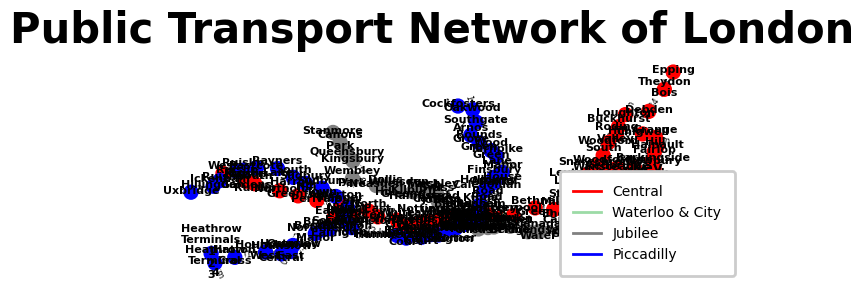

In [84]:
draw_network(lines=df_lines_1, edges=df2, stations=df_stations_2)

Visualize using Plotly package for interactive graph

In [85]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

def draw_network(stations, edges, lines, figsize=(10, 10)):
    MyGraph = nx.Graph()
    
    # Add nodes
    for index, row in stations.iterrows():
        MyGraph.add_node(row['Station'], npos=(row['Longitude'], row['Latitude']), color='black', border='black')
    
    # Add edges
    for index, row in edges.iterrows():
        first_line = row['Line']
        line_color = df_lines[df_lines['Line'] == first_line]['Color'].values[0]
        MyGraph.add_edge(row['Station from (A)'], row['Station to (B)'], weight=row['Distance (Kms)'], color=line_color)
        
    # Extract attributes from the graph to dictionaries
    pos = nx.get_node_attributes(MyGraph, 'npos')
    edgecolor = nx.get_edge_attributes(MyGraph, 'color')
    edgeweight = nx.get_edge_attributes(MyGraph, 'weight')

    # Create edge traces
    edge_trace = []
    for edge in MyGraph.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        color = edge[2]['color']
        weight = edge[2]['weight']
        edge_trace.append(
            go.Scatter(
                x=[x0, x1, None],
                y=[y0, y1, None],
                line=dict(width=weight, color=color),
                hoverinfo='none',
                mode='lines'
            )
        )

    # Create node traces
    node_trace = go.Scatter(
        x=[pos[node][0] for node in MyGraph.nodes()],
        y=[pos[node][1] for node in MyGraph.nodes()],
        text=[node for node in MyGraph.nodes()],
        mode='markers+text',
        textposition='top center',
        marker=dict(size=10, color='black'),
        hoverinfo='text'
    )

    # Create plot layout
    layout = go.Layout(
        title='Public Transport Network of London',
        titlefont_size=30,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        height=figsize[1] * 100,  # Scale the figure size appropriately
        width=figsize[0] * 100
    )

    # Create figure
    fig = go.Figure(data=edge_trace + [node_trace], layout=layout)

    # Display the figure
    fig.show()

# Sample usage with assumed DataFrames
draw_network(df_stations_1, df, df_lines)

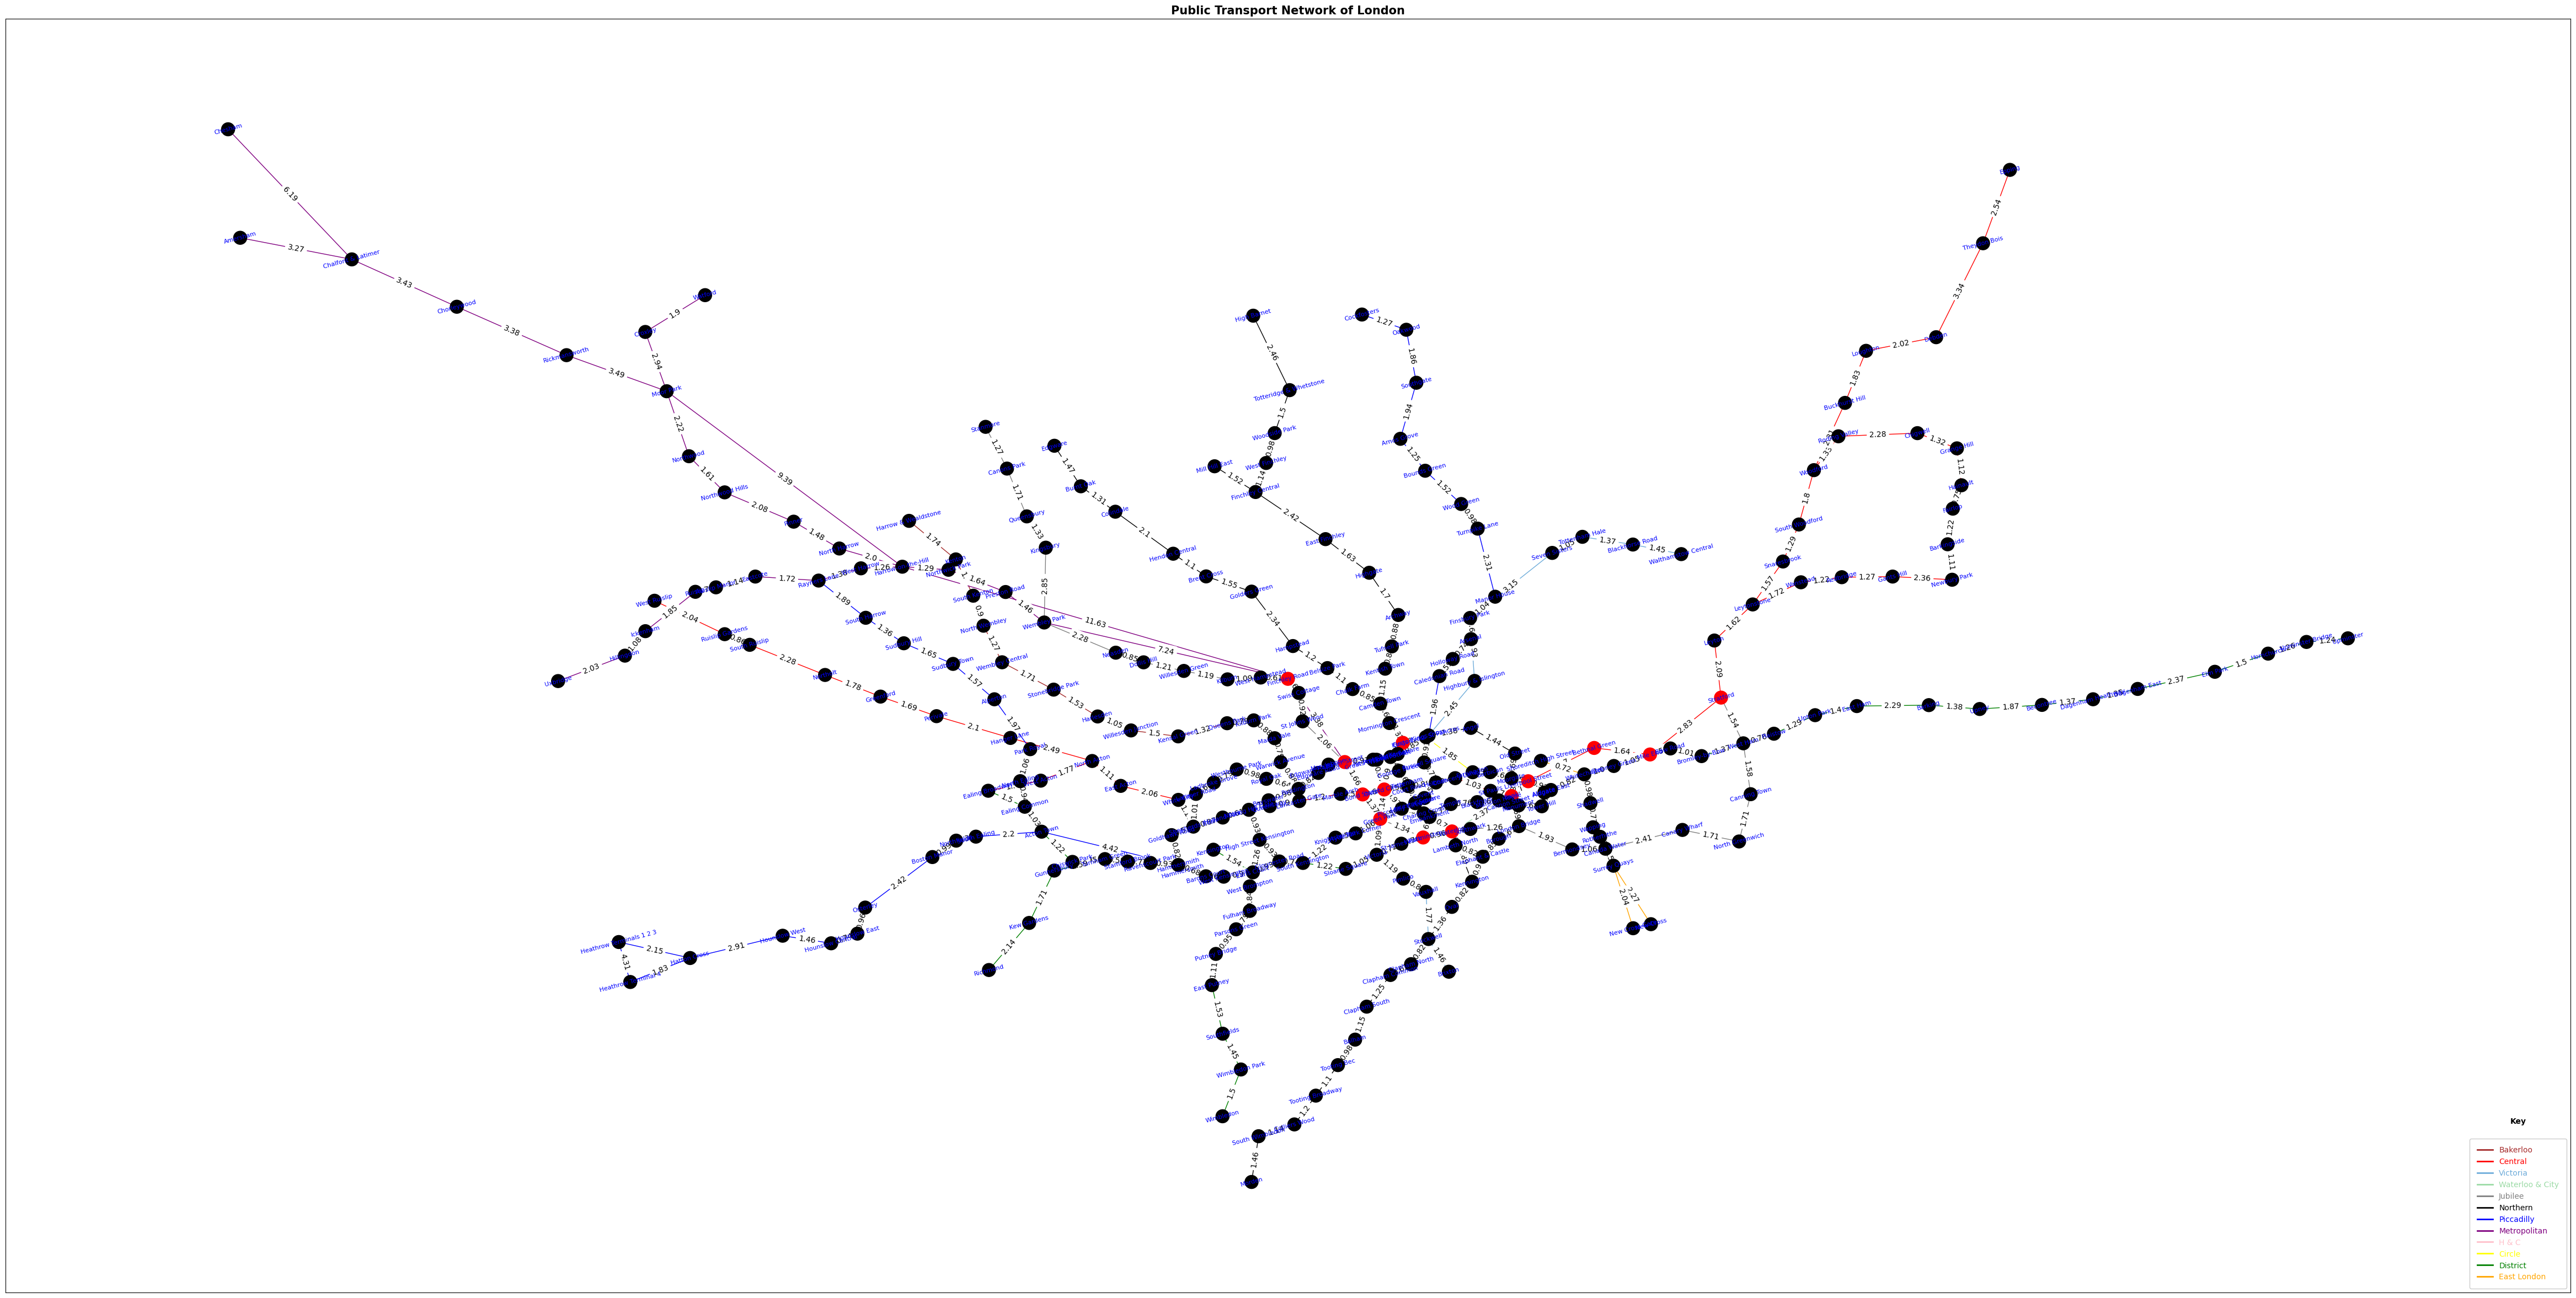

In [86]:
import networkx as nx
import pandas as pd

# Create the graph
MyGraph = nx.Graph()

for index, row in df_stations_1.iterrows():
    MyGraph.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']))

for index, row in df.iterrows():
    MyGraph.add_edge(row['Station from (A)'], row['Station to (B)'], weight=row['Distance (Kms)'])

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(MyGraph)

# Define threshold for critical nodes
threshold = 0.2
critical_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > threshold]

import matplotlib.pyplot as plt

def draw_network(stations=df_stations_1, edges=df, lines=df_lines, figsize=(10, 10)):
    MyGraph = nx.Graph()
    
    # Add nodes
    for index, row in stations.iterrows():
        MyGraph.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']), color='black', border='black')
    
    # Add edges
    for index, row in edges.iterrows():
        first_line = row['Line']
        line_color = df_lines[df_lines['Line'] == first_line]['Color'].values[0]
        MyGraph.add_edge(row['Station from (A)'], row['Station to (B)'], weight=row['Distance (Kms)'], color=line_color)
        
    # Extract attributes from the graph to dictionaries
    pos = nx.get_node_attributes(MyGraph, 'pos')
    edgecolor = nx.get_edge_attributes(MyGraph, 'color')
    edgeweight = nx.get_edge_attributes(MyGraph, 'weight')
    
    # Place the values from the dictionaries in lists
    EdgeList = list(edgecolor.values())
    
    # Draw the graph's nodes and edges
    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(MyGraph, pos=pos, edge_color=EdgeList)
    nx.draw_networkx_edge_labels(MyGraph, pos=pos, edge_labels=edgeweight, font_size=10)
    
    # Highlight critical nodes
    node_colors = ['red' if node in critical_nodes else 'black' for node in MyGraph.nodes()]
    nx.draw_networkx_nodes(MyGraph, pos=pos, node_color=node_colors, node_size=300)
    
    # Display the name of the stations
    for index, row in stations.iterrows():
        name = row['Station']
        if name == "Tottenham Court Road":
            name = "Tottenham\nCourt Road"  # Wrap the text
        elif name == "Covent Garden":
            name = "Covent\nGarden" # Wrap the text           
        plt.text(row['Longitude'], row['Latitude'], name, rotation=15, ha='center', va='center', fontsize=8, color='blue')
    
    # Draw legend
    for index, row in lines.iterrows():
        plt.plot([], [], color=row['Color'], label=row['Line'], linewidth=2)
    legend = plt.legend(loc='lower right', fontsize=8, frameon=True, framealpha=1, borderpad=1, prop={'size':10})
    legend.get_frame().set_linewidth(1)
    
    # Set legend font color
    for index, row in lines.iterrows():
        legend.get_texts()[index].set_color(row['Color'])
    
    # Add "Key" text above the legend
    legend_bbox = legend.get_window_extent().transformed(plt.gca().transData.inverted())
    plt.text((legend_bbox.x0 + legend_bbox.x1) / 2, legend_bbox.y1 + 0.005, "Key", fontsize=10, ha='center', va='center', weight='bold')
    
    # Visualize the graph
    plt.title('Public Transport Network of London', fontsize=15, fontweight='bold')
    plt.grid(axis='x', alpha=0)
    plt.grid(axis='y', alpha=0)
    plt.show()

draw_network(figsize=(60, 30))
